In [1]:
import os
import pandas as pd
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# Define parameters for feature extraction
n_mfcc = 40
n_fft = 1024  # Setting the FFT size to 1024
hop_length = 10 * 16  # 25ms*16khz samples has been taken
win_length = 25 * 16  # 25ms*16khz samples has been taken for window length
window = 'hann'  # Hann window used
n_mels = 128
n_bands = 7  # Number of bands for spectral contrast feature extraction
fmin = 100
bins_per_octave = 12

In [3]:
# Define function to extract features
def extract_features(file_path):
    try:
        # Load audio file and extract features
        y, sr = librosa.load(file_path, sr=16000)
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length,
                                             win_length=win_length, window=window).T, axis=0)
        mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length,
                                                      win_length=win_length, window='hann', n_mels=n_mels).T, axis=0)
        stft = np.abs(librosa.stft(y))
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, y=y, sr=sr).T, axis=0)
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, y=y, sr=sr, n_fft=n_fft,
                                                              hop_length=hop_length, win_length=win_length,
                                                              n_bands=n_bands, fmin=fmin).T, axis=0)
        tonnetz = np.mean(librosa.feature.tonnetz(y=y, sr=sr).T, axis=0)
        features = np.concatenate((mfcc, chroma, mel, contrast, tonnetz))
        return features
    except Exception as e:
        print(f"Error: Exception occurred in feature extraction for file {file_path}: {e}")
        return None

In [4]:
# Define path to data directory
data_folder = 'donateacry_corpus_cleaned_and_updated_data'
# Initialize empty lists to hold extracted features and labels
features = []
labels = []

# Loop through the directories
for label in os.listdir(data_folder):
    # Loop through the files in each directory
    print(f"{label} data is loading.....")
    for file_name in os.listdir(os.path.join(data_folder, label)):
        file_path = os.path.join(data_folder, label, file_name)
        # Extract features and append to list
        feature = extract_features(file_path)
        if feature is not None:
            features.append(feature)
            labels.append(label)
    print(f"{label} data loaded....")

# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Encode labels as integers
le = LabelEncoder()
labels = le.fit_transform(labels)


belly_pain data is loading.....
belly_pain data loaded....
burping data is loading.....
burping data loaded....
discomfort data is loading.....
discomfort data loaded....
hungry data is loading.....
hungry data loaded....
tired data is loading.....
tired data loaded....


In [5]:
# from sklearn.preprocessing import StandardScaler

# # Assuming 'features' is your data matrix
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)

In [6]:
# Print the length of feature_names and the number of features extracted
print("Length of feature_names:", len(feature))
print("Number of features extracted:", features.shape[1])

# Update feature_names list to match the correct number of features
feature_names = [
    *[f"mfcc_{i}" for i in range(n_mfcc)],
    *[f"chroma_{i}" for i in range(12)],
    *[f"mel_{i}" for i in range(n_mels)],
    *[f"contrast_{i}" for i in range(n_bands + 1)],
    *[f"tonnetz_{i}" for i in range(6)]  
]

# Convert features and labels to DataFrame
df_features = pd.DataFrame(features, columns=feature_names)
df_labels = pd.DataFrame(labels, columns=['Cry Reason'])

# Concatenate features and labels DataFrames
df = pd.concat([df_features, df_labels], axis=1)

# Optionally, you can save the DataFrame to a CSV file
df.to_csv('features_extracted.csv', index=False)

Length of feature_names: 194
Number of features extracted: 194


In [7]:
df
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
452    4
453    4
454    4
455    4
456    4
Name: Cry Reason, Length: 457, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from matplotlib import pyplot

Class=0, n=16 (3.501%)
Class=1, n=8 (1.751%)
Class=2, n=27 (5.908%)
Class=3, n=382 (83.589%)
Class=4, n=24 (5.252%)


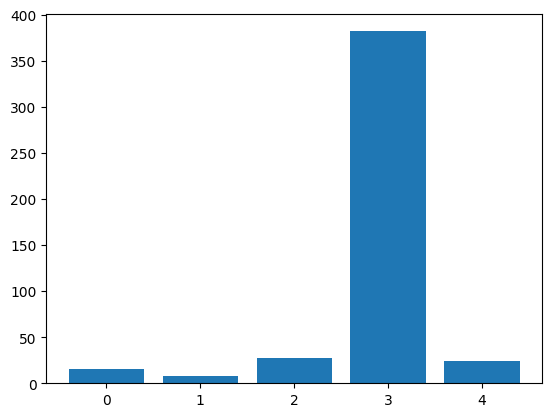

In [9]:
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [10]:
from imblearn.over_sampling import SMOTE

Class=0, n=382 (20.000%)
Class=1, n=382 (20.000%)
Class=2, n=382 (20.000%)
Class=3, n=382 (20.000%)
Class=4, n=382 (20.000%)


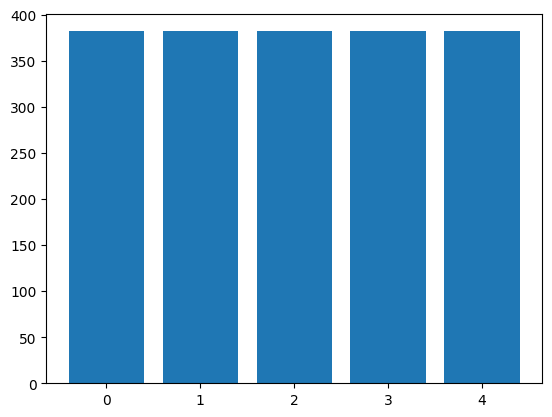

In [11]:
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [12]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=43)
X_train

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,contrast_4,contrast_5,contrast_6,contrast_7,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5
1680,-436.057901,111.972747,-63.190406,28.674915,-18.025050,-25.934044,6.470975,-30.220859,-2.412515,-5.407565,...,18.459870,18.000290,70.982687,17.117026,-0.003311,0.003339,-0.020119,0.020897,-0.002705,-0.004977
1254,-355.983272,114.174373,-94.208972,14.037541,-27.542289,-26.151451,21.049038,-27.725293,-3.548289,-0.147737,...,22.079602,19.214674,71.907738,18.171159,0.009935,-0.005583,-0.002089,0.021199,-0.011062,0.001859
546,-546.348488,115.181001,-72.545306,11.263867,-5.223684,-40.422756,7.298523,0.255650,-10.068348,-2.142972,...,21.241537,22.341304,62.051713,18.042756,0.004841,-0.000387,0.027806,0.001522,0.001270,0.003305
207,-524.814209,92.326637,-42.620342,31.707357,-12.852776,-11.366632,18.258329,-16.905142,3.742383,-1.512431,...,15.844344,15.566746,61.479967,10.839999,0.006448,0.025818,0.020362,0.002848,0.000143,0.001757
326,-485.810272,148.541199,-60.546719,31.990944,-0.842054,-14.774175,18.661650,-19.736345,-3.945372,-3.249698,...,16.165693,15.651128,70.378446,16.219805,-0.004661,0.001263,-0.006026,0.009792,0.006268,-0.025162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,-418.140839,134.513733,-20.108009,22.596931,5.007020,-14.194401,7.132775,-6.719449,0.190655,2.837616,...,17.387828,17.715664,58.424969,9.102186,-0.005136,0.009238,0.006005,0.005330,-0.004326,0.000534
1841,-370.580337,161.197054,-57.699457,10.081805,-28.580667,-31.374881,1.869538,-31.058998,-4.842018,-8.548123,...,21.529926,19.788259,70.389127,18.287192,-0.012103,-0.017686,0.031819,-0.008258,-0.007039,-0.001920
255,-588.439148,69.175728,-13.401588,-1.156400,-7.193047,-13.410317,-6.457418,-11.807004,-8.562527,-13.086902,...,16.655856,16.089722,54.907597,8.915032,0.013097,0.021878,-0.041748,0.067280,0.005040,0.011566
1344,-380.967468,118.532387,-100.240003,42.048585,-19.112537,-24.577745,26.616084,-31.140292,-0.468805,1.825950,...,20.467971,20.122213,75.102480,17.548367,0.015567,0.002270,0.005538,0.016342,-0.014695,0.009322


In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
from sklearn.svm import SVC  # Import the Support Vector Classifier

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


# Create the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=42)  # You can adjust the kernel and C parameter as needed

# Train the model
svm_classifier.fit(X_train,y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       109
           1       0.95      1.00      0.98       123
           2       0.86      0.98      0.92       123
           3       0.96      0.66      0.78       106
           4       0.96      0.99      0.97       112

    accuracy                           0.93       573
   macro avg       0.93      0.93      0.92       573
weighted avg       0.93      0.93      0.93       573

Confusion Matrix:
[[109   0   0   0   0]
 [  0 123   0   0   0]
 [  0   0 120   3   0]
 [  6   6  19  70   5]
 [  1   0   0   0 111]]


In [15]:
from sklearn.ensemble import RandomForestClassifier
# Adding random forest algo 
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=67)

# Train the model
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       109
           1       1.00      1.00      1.00       123
           2       0.97      1.00      0.98       123
           3       0.99      0.92      0.95       106
           4       0.97      0.99      0.98       112

    accuracy                           0.98       573
   macro avg       0.98      0.98      0.98       573
weighted avg       0.98      0.98      0.98       573

Confusion Matrix:
[[109   0   0   0   0]
 [  0 123   0   0   0]
 [  0   0 123   0   0]
 [  1   0   4  97   4]
 [  0   0   0   1 111]]
